In [1]:
# Mounting drive (datasets were saved on the drive)
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/IT352 Project

/content/drive/MyDrive/IT352 Project


In [3]:
import os

def verify_directories(*dirs):
    for directory in dirs:
        if os.path.exists(directory):
            print(f"Directory verified: {directory}")
        else:
            print(f"Directory not found: {directory}")

grayscale_images_path = '/content/drive/MyDrive/IT352 Project/datasets/cicids2017_grayscale_images'
rgb_images_path = '/content/drive/MyDrive/IT352 Project/datasets/cicids2017_rgb_images'
verify_directories(grayscale_images_path, rgb_images_path)


Directory verified: /content/drive/MyDrive/IT352 Project/datasets/cicids2017_grayscale_images
Directory verified: /content/drive/MyDrive/IT352 Project/datasets/cicids2017_rgb_images


In [4]:
# List the files in each directory
grayscale_image_files = [os.path.join(grayscale_images_path, f) for f in os.listdir(grayscale_images_path) if f.endswith('.png')]
rgb_image_files = [os.path.join(rgb_images_path, f) for f in os.listdir(rgb_images_path) if f.endswith('.png')]

# Just to check if the files are listed
print("Number of grayscale images:", len(grayscale_image_files))
print("Number of RGB images:", len(rgb_image_files))


Number of grayscale images: 20000
Number of RGB images: 20000


In [5]:
# Adjust these paths according to your dataset location in Google Drive
grayscale_images_path = '/content/drive/MyDrive/IT352 Project/datasets/cicids2017_grayscale_images'
rgb_images_path = '/content/drive/MyDrive/IT352 Project/datasets/cicids2017_rgb_images'


In [6]:
import numpy as np
import cv2
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from sklearn.model_selection import train_test_split

# # # Number of images per class
# # num_images_per_class = 10000

# # # Generate labels
# # labels = np.array([0] * num_images_per_class + [1] * num_images_per_class)

# # Function to load and preprocess images
# def load_and_preprocess_image(image_path, grayscale=False):
#     # Load the image
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
#     # # Resize the image to (64, 64) if it's not already
#     # if img.shape[0] != 64 or img.shape[1] != 64:
#     #     img = cv2.resize(img, (64, 64))
#     # If it's a grayscale image, we need to add an extra dimension to make it (64, 64, 1)
#     if grayscale:
#         img = img[:, :, np.newaxis]
#     # Preprocess the image for MobileNetV3
#     img = preprocess_input(img)
#     return img

# # # Load and preprocess images (whole)
# # grayscale_images = np.array([load_and_preprocess_image(path, grayscale=True) for path in grayscale_image_files])
# # rgb_images = np.array([load_and_preprocess_image(path) for path in rgb_image_files])

# # # Verify shapes
# # print(f'Grayscale images shape: {grayscale_images.shape}')
# # print(f'RGB images shape: {rgb_images.shape}')
# # print(f'Labels shape: {labels.shape}')


# subset_size_per_class = 500
# # Modify the loading and preprocessing function to limit the number of images
# def load_subset_images(image_files, subset_size_per_class):
#     # Select 500 from the start of one class and 500 from the start of the next class
#     selected_paths = image_files[:subset_size_per_class] + image_files[-subset_size_per_class:]
#     # Load and preprocess selected images
#     images = np.array([load_and_preprocess_image(path) for path in selected_paths])
#     return images

# # Apply to both grayscale and RGB images
# grayscale_images_subset = load_subset_images(grayscale_image_files, subset_size_per_class)
# rgb_images_subset = load_subset_images(rgb_image_files, subset_size_per_class)

# # Generate labels for the subset
# labels_subset = np.array([0] * subset_size_per_class + [1] * subset_size_per_class)

# print(f'Grayscale subset shape: {grayscale_images_subset.shape}')
# print(f'RGB subset shape: {rgb_images_subset.shape}')
# print(f'Labels subset shape: {labels_subset.shape}')



In [7]:
subset_size_per_class = 2000
selected_paths_grayscale = grayscale_image_files[:subset_size_per_class] + grayscale_image_files[-subset_size_per_class:]
selected_paths_rgb = rgb_image_files[:subset_size_per_class] + rgb_image_files[-subset_size_per_class:]

labels_subset = np.array([0] * subset_size_per_class + [1] * subset_size_per_class)

# Split file paths and labels into training and testing sets for both grayscale and RGB images
gray_train_files, gray_test_files, y_train_gray, y_test_gray = train_test_split(
    selected_paths_grayscale, labels_subset, test_size=0.2, random_state=42, stratify=labels_subset
)
rgb_train_files, rgb_test_files, y_train_rgb, y_test_rgb = train_test_split(
    selected_paths_rgb, labels_subset, test_size=0.2, random_state=42, stratify=labels_subset
)

# Ensure that y_train_gray and y_train_rgb are identical, as they should be since the images correspond
assert np.array_equal(y_train_gray, y_train_rgb), "Mismatch in training labels between grayscale and RGB datasets."

# Now we can just use y_train_gray (or y_train_rgb, since they're the same) as y_train
y_train = y_train_gray  # or y_train_rgb, both are equivalent


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming labels_subset was defined earlier as shown
labels_subset_str = np.array(['0'] * subset_size_per_class + ['1'] * subset_size_per_class).astype(str)

# Split file paths and labels for grayscale images
gray_train_files, gray_test_files, y_train_gray, y_test_gray = train_test_split(
    selected_paths_grayscale, labels_subset_str, test_size=0.2, random_state=42, stratify=labels_subset_str
)

# Split file paths and labels for RGB images
rgb_train_files, rgb_test_files, y_train_rgb, y_test_rgb = train_test_split(
    selected_paths_rgb, labels_subset_str, test_size=0.2, random_state=42, stratify=labels_subset_str
)

# Ensure that y_train_gray and y_train_rgb are identical, as they should be since the images correspond
assert np.array_equal(y_train_gray, y_train_rgb), "Mismatch in training labels between grayscale and RGB datasets."

# Now we can just use y_train_gray (or y_train_rgb, since they're the same) as y_train
y_train = y_train_gray  # or y_train_rgb, both are equivalent

# Create an ImageDataGenerator for the training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create an ImageDataGenerator for the grayscale images with a custom preprocessing function
def grayscale_preprocessor(image):
    # Preprocessing for grayscale images
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # image = image[:, :, np.newaxis]
    return preprocess_input(image.astype(np.float32))

train_datagen_gray = ImageDataGenerator(preprocessing_function=grayscale_preprocessor)

# Define the batch size
batch_size = 32

# Create the training generators
train_generator_rgb = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': rgb_train_files, 'class': y_train_rgb}),
    directory=None,  # None because the filenames include the full paths
    x_col='filename',
    y_col='class',
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Assuming `gray_train_files` and `y_train_gray` are already defined
train_generator_gray = train_datagen_gray.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': gray_train_files, 'class': y_train_gray}),
    directory=None,  # The filenames include the full paths
    x_col='filename',
    y_col='class',
    target_size=(64, 64),
    color_mode='grayscale',  # Still load them as grayscale
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)


Found 3200 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV3Small

def create_mobilenetv3_model(input_shape=(64, 64, 3)):
    # Load MobileNetV3Small with pre-trained ImageNet weights
    base_model = MobileNetV3Small(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze the base model
    base_model.trainable = False

    # Create a custom top classifier
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])


    return model

# Create the model
model_rgb = create_mobilenetv3_model()

# Compile the model
model_rgb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_rgb.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 2, 2, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d_3  (None, 576)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               73856     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1013105 (3.86 MB)
Trainable params: 7398

In [21]:
def create_mobilenetv3_model_grayscale(input_shape=(64, 64, 1)):
    # Load MobileNetV3Small with pre-trained ImageNet weights
    # MobileNetV3 expects three-channel inputs; since we're dealing with grayscale images,
    # we use a Lambda layer to replicate the single channel across three channels
    base_model = MobileNetV3Small(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

    # Freeze the base model
    base_model.trainable = False

    # Create a custom top classifier
    model = models.Sequential([
        layers.Lambda(lambda x: tf.tile(x, multiples=[1, 1, 1, 3])),  # Replicates the grayscale channel across to simulate RGB
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ], name="Grayscale_MobileNetV3")

    return model

# Create the model for grayscale images
model_gray = create_mobilenetv3_model_grayscale()

# Compile the model
model_gray.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

dummy_input = np.zeros((1, 64, 64, 1))
# Pass the dummy data through the model to build it
_ = model_gray.predict(dummy_input)

# Now, calling summary should work without errors
model_gray.summary()


1/1 [==============================] - 2s 2s/step
Model: "Grayscale_MobileNetV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 64, 64, 3)         0         
                                                                 
 MobilenetV3small (Function  (None, 2, 2, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d_4  (None, 576)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 128)               73856     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                             

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping callback to stop training if no improvement is seen
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# ModelCheckpoint callback to save the Keras model or model weights at some frequency
model_checkpoint_rgb = ModelCheckpoint(
    filepath='./best_model_rgb.h5',  # Path to save the model file
    monitor='val_accuracy',
    save_best_only=True,  # Save only the best model
    mode='max'  # Maximize validation accuracy
)

model_checkpoint_gray = ModelCheckpoint(
    filepath='./best_model_gray.h5',  # Adjust the path as needed
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)


In [23]:
# history_rgb = model_rgb.fit(
#     train_generator_rgb,
#     epochs=10,  # Adjust the number of epochs based on your requirements and observations
#     validation_data=train_generator_rgb,  # Replace with a validation generator if you have one
# )

history_rgb = model_rgb.fit(
    train_generator_rgb,
    epochs=50,  # Adjust based on your observations and requirements
    validation_data=train_generator_rgb,  # Ideally, replace with a validation generator
    callbacks=[early_stopping, model_checkpoint_rgb]  # Add callbacks here
)


Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.7734

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 767s 8s/step - loss: 0.4737 - accuracy: 0.7734 - val_loss: 0.3441 - val_accuracy: 0.8400
Epoch 2/50
100/100 [==============================] - 38s 378ms/step - loss: 0.3174 - accuracy: 0.8700 - val_loss: 0.2625 - val_accuracy: 0.8978
Epoch 3/50
100/100 [==============================] - 39s 396ms/step - loss: 0.2582 - accuracy: 0.8950 - val_loss: 0.2530 - val_accuracy: 0.8916
Epoch 4/50
100/100 [==============================] - 40s 397ms/step - loss: 0.2363 - accuracy: 0.9034 - val_loss: 0.2039 - val_accuracy: 0.9206
Epoch 5/50
100/100 [==============================] - 61s 615ms/step - loss: 0.2136 - accuracy: 0.9169 - val_loss: 0.2093 - val_accuracy: 0.9141
Epoch 6/50
100/100 [==============================] - 35s 349ms/step - loss: 0.2133 - accuracy: 0.9181 - val_loss: 0.1726 - val_accuracy: 0.9359
Epoch 7/50
100/100 [==============================] - 35s 351ms/step - loss: 0.1861 - accuracy: 0.9309 - val_loss: 0.1651 - val_accuracy: 0.939

In [24]:
history_gray = model_gray.fit(
    train_generator_gray,
    epochs=50,  # Adjust based on your observations and requirements
    validation_data=train_generator_gray,  # Ideally, replace with a validation generator
    callbacks=[early_stopping, model_checkpoint_gray]  # Add callbacks here
)


Epoch 1/50
100/100 [==============================] - 35s 302ms/step - loss: 0.4230 - accuracy: 0.7887 - val_loss: 0.3077 - val_accuracy: 0.8606
Epoch 2/50
100/100 [==============================] - 30s 299ms/step - loss: 0.2709 - accuracy: 0.8841 - val_loss: 0.2214 - val_accuracy: 0.9156
Epoch 3/50
100/100 [==============================] - 28s 285ms/step - loss: 0.2236 - accuracy: 0.9162 - val_loss: 0.1958 - val_accuracy: 0.9234
Epoch 4/50
100/100 [==============================] - 35s 355ms/step - loss: 0.2063 - accuracy: 0.9209 - val_loss: 0.1765 - val_accuracy: 0.9306
Epoch 5/50
100/100 [==============================] - 36s 358ms/step - loss: 0.1840 - accuracy: 0.9300 - val_loss: 0.1653 - val_accuracy: 0.9372
Epoch 6/50
100/100 [==============================] - 36s 365ms/step - loss: 0.1912 - accuracy: 0.9250 - val_loss: 0.1596 - val_accuracy: 0.9397
Epoch 7/50
100/100 [==============================] - 35s 347ms/step - loss: 0.1770 - accuracy: 0.9319 - val_loss: 0.1656 - val_ac

In [14]:
# model_gray = create_mobilenetv3_model_grayscale()

# model_gray.compile(optimizer='adam',
#                    loss='binary_crossentropy',
#                    metrics=['accuracy'])


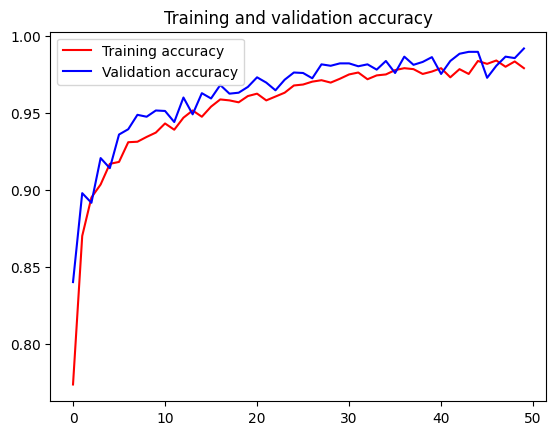

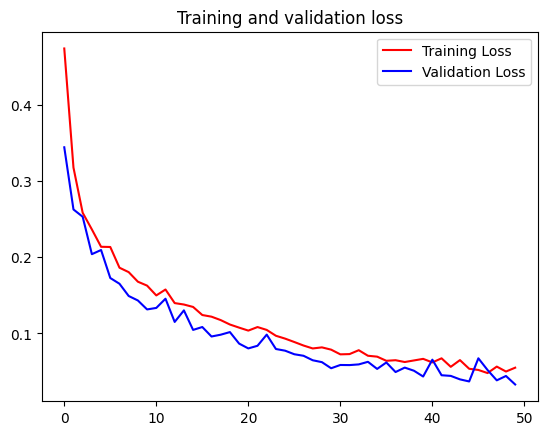

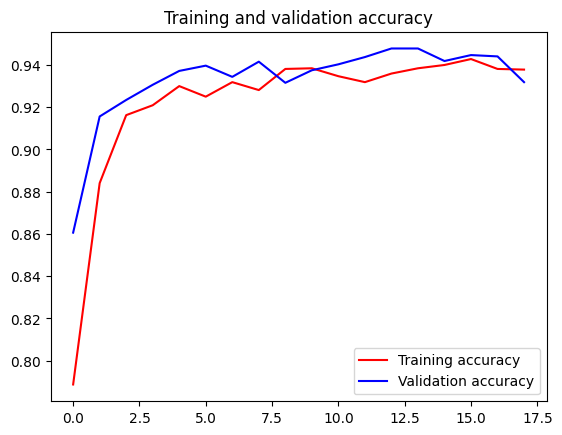

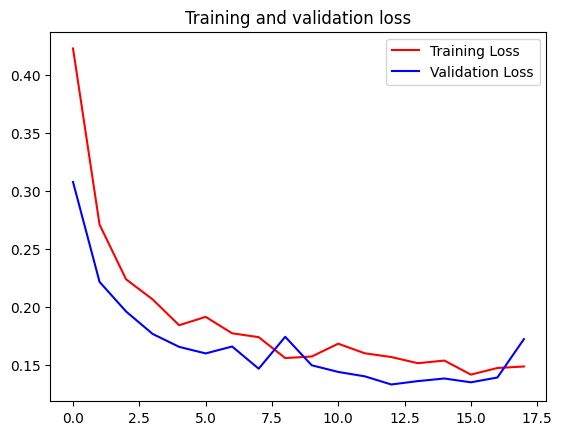

In [25]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

# Plot the training history for the RGB model
plot_training_history(history_rgb)

# Similarly, plot the training history for the Grayscale model after its training
plot_training_history(history_gray)


In [ ]:
import os

model_dir = '/content/drive/MyDrive/IT352 Project/models/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


# Save the RGB model
model_rgb.save('/content/drive/MyDrive/IT352 Project/models/best_model_rgb.h5')

# Save the Grayscale model
model_gray.save('/content/drive/MyDrive/IT352 Project/models/best_model_gray.h5')


In [27]:
from tensorflow.keras.models import load_model

# Update these paths to where you've saved your models
model_rgb_path = '/content/drive/MyDrive/IT352 Project/best_model_rgb.h5'
model_gray_path = '/content/drive/MyDrive/IT352 Project/best_model_gray.h5'

model_rgb = load_model(model_rgb_path)
model_gray = load_model(model_gray_path)


In [31]:
def ensemble_predictions(rgb_pred, gray_pred, rgb_weight=0.98, gray_weight=0.94):
    total_weight = rgb_weight + gray_weight
    normalized_rgb_weight = rgb_weight / total_weight
    normalized_gray_weight = gray_weight / total_weight

    combined_pred = (rgb_pred * normalized_rgb_weight) + (gray_pred * normalized_gray_weight)
    combined_class = (combined_pred > 0.5).astype(int)
    return combined_class


In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load an image file as a numpy array
def load_image(image_path, grayscale=False):
    if grayscale:
        # Load the image, add an extra dimension to represent the single channel
        img = image.load_img(image_path, color_mode='grayscale', target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    else:
        img = image.load_img(image_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Assuming you have two image paths
rgb_image_path = '/content/drive/MyDrive/IT352 Project/datasets/cicids2017_rgb_images/rgb_image_11247.png'  # Update this path
gray_image_path = '/content/drive/MyDrive/IT352 Project/datasets/cicids2017_grayscale_images/grayscale_image_11247.png'  # Update this path


# Load and preprocess the images
rgb_img = load_image(rgb_image_path, grayscale=False)
gray_img = load_image(gray_image_path, grayscale=True)


In [33]:
rgb_pred = model_rgb.predict(rgb_img)
gray_pred = model_gray.predict(gray_img)

# Assuming your models output probabilities and you're dealing with binary classification
# Adjust the decision threshold and weights as necessary
combined_class = ensemble_predictions(rgb_pred, gray_pred)

print("Combined Prediction:", combined_class)


1/1 [==============================] - 0s 24ms/step
Combined Prediction: [[0]]
